# Monte Carlo simulations:

An important problem in statistical computation is Monte Carlo simulation, and a commonly-used method is Markov chain, or random walk simulation.

In one of such simulations, a computer program simulates a random walk through a probability distribution. The idea is to run the random walk long enough so that it has time to take a tour through most of the distribution.

A basic idea in implementation is to simulate several parallel random walks, so that you can:

(1) go through several parts of the distribution at once, and 

(2) compare the paths of the several random walks to assess convergence. When the random walks are close to convergence to their ergodic distribution, their paths will have similar statistical properties.

## Random walk:

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

Some examples, which can be approximated by random walk models, include:

- The path traced by a molecule as it travels in a liquid or a gas

- The search path of a foraging animal

- The price of a fluctuating stock.

- The financial status of a gambler.

As illustrated by those examples, random walks have applications to many scientific fields including:

- Ecology

- Psychology

- Computer science

- Physics

- Chemistry

- Biology

- Economics


Random walks explain the observed behaviors of many processes in these fields and thus serve as a fundamental model for the recorded stochastic activity.

## 1D random walk:

An elementary example of a random walk is the random walk on the integer number line, which starts at $0$ and at each step moves $+1$ or $-1$ with equal probability.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Generate a random path

# n is the number of sample points
def random_path_1D(n):

    # Origin of the path
    x = 0
    y = 0
    
    # Lists of the coordinates of the path
    x_axis = [x]
    y_axis = [y]
    
    for i in range(1, n+1):
        
        # This will determine which direction we move
    
        step = np.random.uniform(0, 1)
        
        if step < 0.5:
            x += 1 # we always go right
            y += 1 # this goes up
        if step >= 0.5:
            x += 1 # we always go right
            y -= 1 # this goes down  

        # Append the coordinates to the empty lists
        x_axis.append(x)
        y_axis.append(y)
        
    # Convert to arrays
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    
    return x_axis, y_axis

In [3]:
print(np.random.uniform(0, 1))

0.8367111383241216


In [4]:
# Fix the steps
n = 1000

path_1 = random_path_1D(n)
path_2 = random_path_1D(n)
path_3 = random_path_1D(n)

#print(path_1[0].shape, path_1[1].shape)

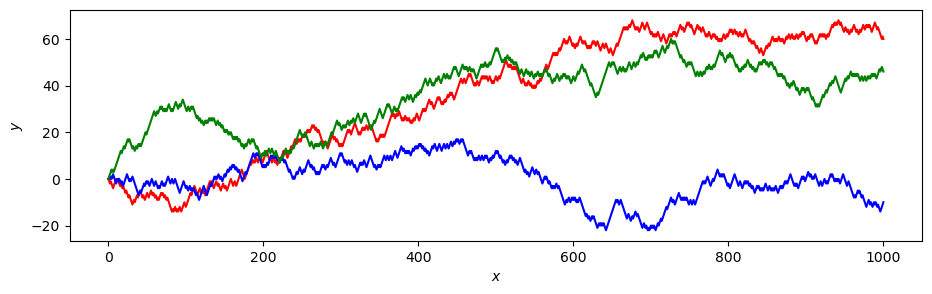

In [5]:
plt.figure(figsize = (11,3))
plt.plot(path_1[0], path_1[1], color = 'red')
plt.plot(path_2[0], path_2[1], color = 'blue')
plt.plot(path_3[0], path_3[1], color = 'green')
#plt.xlim(0,1)
#plt.ylim(0,1)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

## 2D random walk:

In higher dimensions, the set of randomly walked points has interesting geometric properties.

In fact, one gets a discrete **fractal**, that is, a set that exhibits stochastic self-similarity on large scales. On small scales, one can observe “jaggedness” resulting from the grid on which the walk is performed.

The trajectory of a random walk is the collection of points visited, considered as a set with disregard to when the walk arrived at the point.

In [6]:
def random_path_2D(n):
    
    # Origin of the path
    x = np.zeros(n)
    y = np.zeros(n)
    
    # Direction
    direction = ["up", "down", "left", "right"]
    
    for i in range(1, n):

        step = np.random.choice(direction)
        
        if step == "up":
            x[i] = x[i-1] 
            y[i] = y[i-1] + 1
        elif step == "down":
            x[i] = x[i-1] 
            y[i] = y[i-1] - 1
        elif step == "right":
            x[i] = x[i-1] + 1  
            y[i] = y[i-1]
        else:
            x[i] = x[i-1] - 1  
            y[i] = y[i-1]  
    return x, y      

In [9]:
# Example to illustrate the random choice generator

# Pool of options
a = np.array([0, 1, 2, 3])
print(a)

# Random choice
print(np.random.choice(a))
print(np.random.choice(a))
print(np.random.choice(a))
print(np.random.choice(a))


[0 1 2 3]
0
0
1
1


In [10]:
print(random_path_2D(3))

(array([ 0., -1., -1.]), array([0., 0., 1.]))


In [29]:
# Fix the number of steps

n = 1000000

x1, y1 = random_path_2D(n)

x2, y2 = random_path_2D(n)

### Plot:

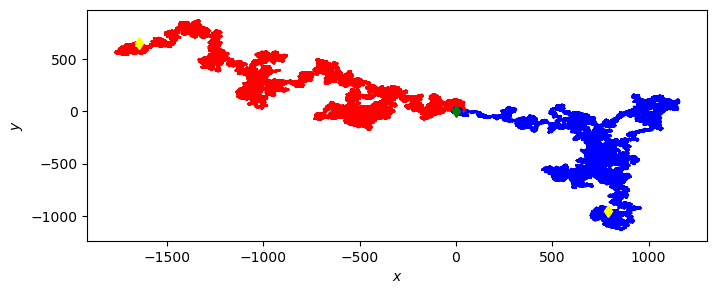

In [30]:
plt.figure(figsize = (8,3))


plt.plot(x1, y1, color = 'red')
plt.plot(x2, y2, color = 'blue')
plt.plot(x1[-1], y1[-1],  marker = 'd',color = 'yellow')
plt.plot(x2[-1], y2[-1], marker = 'd',color = 'yellow')
plt.plot(x1[0], y1[0], marker = 'd', color = "green")
#plt.plot(path_2[0], path_2[1], color = 'blue')
#plt.plot(path_3[0], path_3[1], color = 'green')
#plt.xlim(0,1)
#plt.ylim(0,1)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

NameError: name 'np' is not defined

3.0 3.1622776601683795


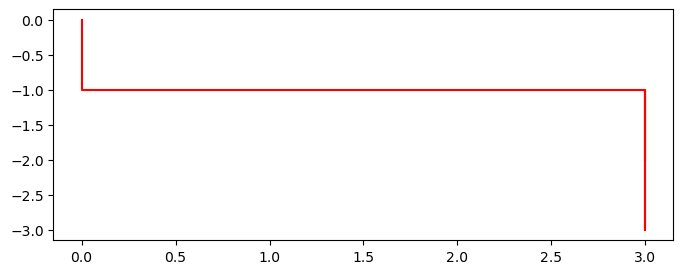

9.9498743710662 10.0


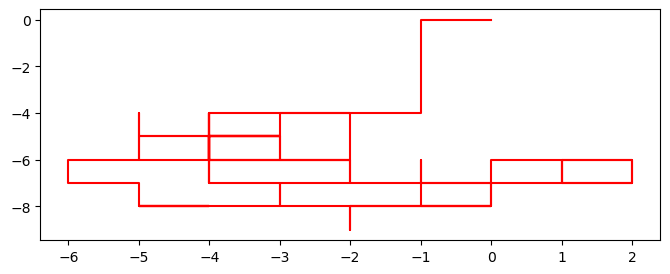

31.606961258558215 31.622776601683793


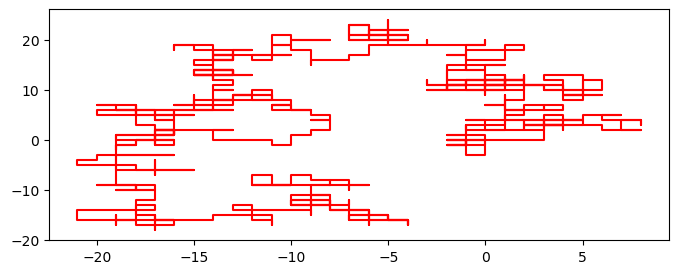

99.99499987499375 100.0


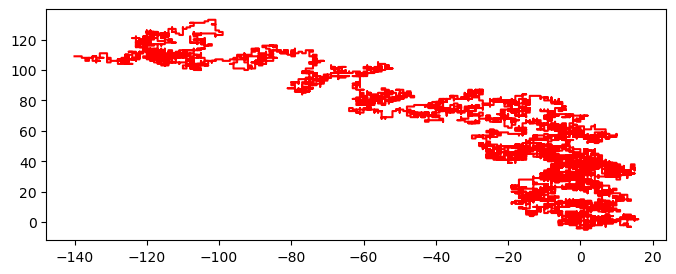

316.226184874055 316.22776601683796


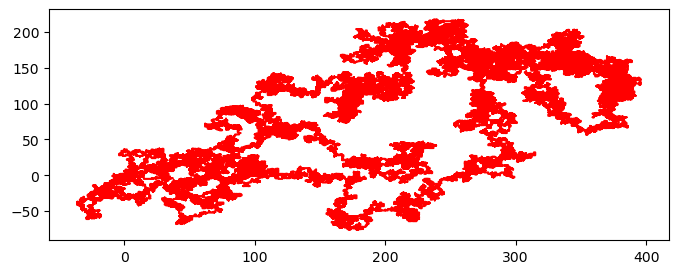

999.999499999875 1000.0


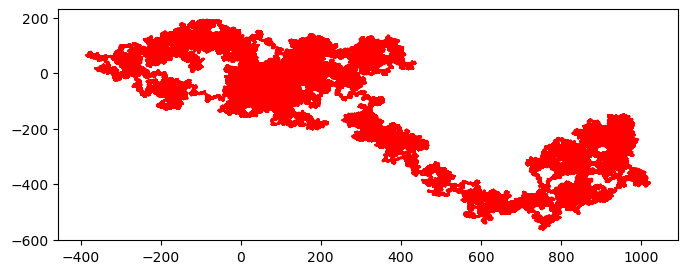

In [31]:
n_samples = 7

x_values = [0]
y_values = [0]

R_values = []
k_values = []

for k in range(1,n_samples):
    
    x1, y1 = random_path_2D(10**k)
    
    
    # deltas x and y
    
    delta_x = x1[1:] - x1[:-1] 
    delta_y = y1[1:] - y1[:-1]     
    
    R = np.sqrt(np.sum(delta_x**2) + np.sum(delta_y**2))
    
    print(R, np.sqrt(10**k))
    
    R_values.append(R)
    k_values.append(np.sqrt(10**k))
    
    plt.figure(figsize = (8,3))
    plt.plot(x1, y1, color = 'red')
    plt.show()


#print(R_values)
#print(k_values)

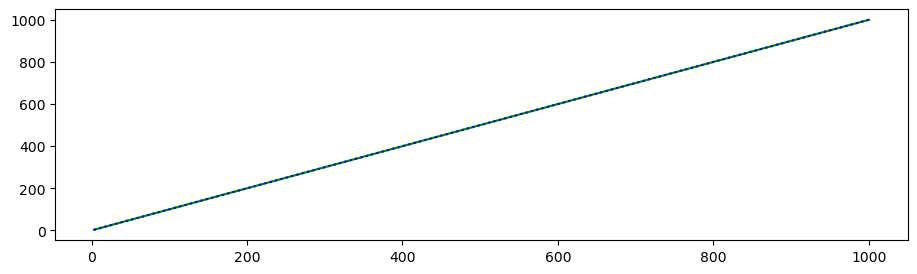

In [32]:
plt.figure(figsize = (11,3))

plt.plot(k_values, R_values, color = "green")
plt.plot(k_values, k_values, color = "blue", linestyle=':')

plt.show()

## 3D random walk:

3.0 3.1622776601683795


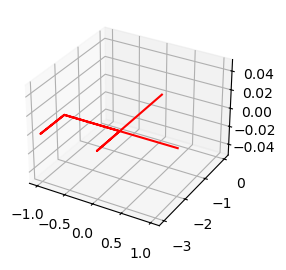

9.9498743710662 10.0


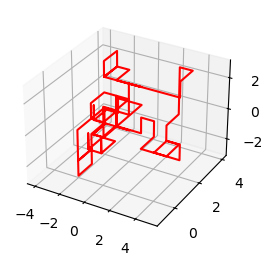

31.606961258558215 31.622776601683793


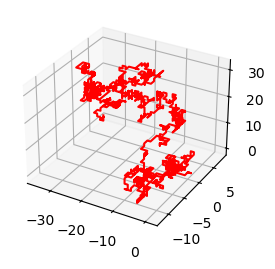

99.99499987499375 100.0


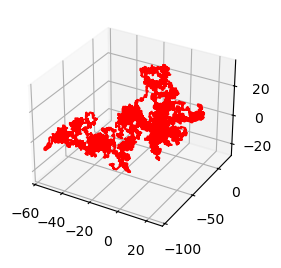

316.226184874055 316.22776601683796


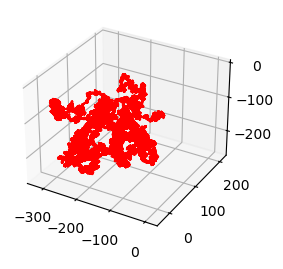

999.999499999875 1000.0


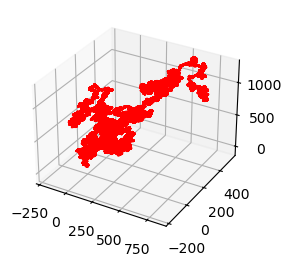

[3.0, 9.9498743710662, 31.606961258558215, 99.99499987499375, 316.226184874055, 999.999499999875]
[3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0]


In [33]:
n_samples = 7

x_values = [0]
y_values = [0]
z_values = [0]

R_values = []
k_values = []

for k in range(1,n_samples):

    def random_path_3D(n):

        # Origin of the path
        x = np.zeros(n)
        y = np.zeros(n)
        z = np.zeros(n)

        # Direction
        direction = ["up", "down", "left", "right", "forward", "backward"]

        for i in range(1, n):

            step = np.random.choice(direction)

            if step == "up":
                x[i] = x[i-1] 
                y[i] = y[i-1] + 1
                z[i] = z[i-1]                 
            elif step == "down":
                x[i] = x[i-1] 
                y[i] = y[i-1] - 1
                z[i] = z[i-1]
            elif step == "right":
                x[i] = x[i-1] + 1  
                y[i] = y[i-1]
                z[i] = z[i-1]
            elif step == "left":
                x[i] = x[i-1] - 1  
                y[i] = y[i-1]
                z[i] = z[i-1]
            elif step == "forward":
                x[i] = x[i-1] 
                y[i] = y[i-1]
                z[i] = z[i-1] + 1 
            else:
                x[i] = x[i-1]  
                y[i] = y[i-1]
                z[i] = z[i-1] - 1
        return x, y, z      

    x1, y1, z1 = random_path_3D(10**k)
    
    
    # deltas x and y
    
    delta_x = x1[1:] - x1[:-1] 
    delta_y = y1[1:] - y1[:-1]
    delta_z = z1[1:] - z1[:-1]   
    
    R = np.sqrt(np.sum(delta_x**2) + np.sum(delta_y**2) + np.sum(delta_z**2))
    
    print(R, np.sqrt(10**k))
    
    R_values.append(R)
    k_values.append(np.sqrt(10**k))
    
    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(projection ='3d')
    ax.plot(x1, y1, z1, color = 'red')
    plt.show()


print(R_values)
print(k_values)

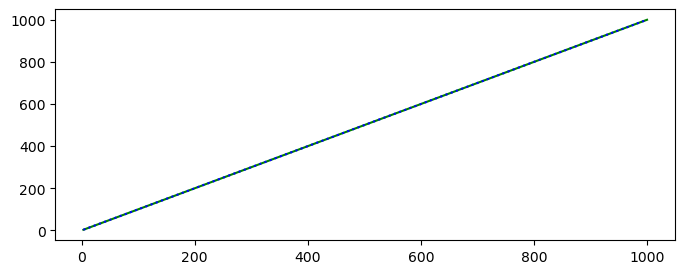

In [34]:
plt.figure(figsize = (8,3))

plt.plot(k_values, R_values, color = "green")
plt.plot(k_values, k_values, color = "blue", linestyle=':')

plt.show()